# Ford GoBike System 2019

# Introduction
Introduction
Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.[3] Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose 

# overview
in this investigation i want to look at when do users use ford bikes alot,at which part of week it used and who use it frequently , enough data are avilable to do exploration 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches


%matplotlib inline

In [2]:
df=pd.read_csv('ford_gobike_system_2019_clean.csv')
df.head(5)

,bike_id,duration_minute,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,1347.087517,196,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,229,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber
1,5506,1098.338117,134,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,4,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber
2,2717,1043.893433,157,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,245,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer
3,4557,744.676650,53,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,85,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer
4,2100,1011.825400,28,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,16,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer


In [3]:
#convert data type of start_time and end_time from string to datetime.
df['start_time']=pd.to_datetime(df['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
df['end_time']=pd.to_datetime(df['end_time'],format='%Y-%m-%d %H:%M:%S.%f')

In [4]:
# create new column with day name
df['day_of_week'] = df['start_time'].dt.day_name()

In [5]:
# create new column with month
df['month']=df['start_time'].dt.month

# create new column with hour
df['hour']=df['start_time'].dt.hour

# create new column with day of month
df['day_of_month']=df['start_time'].dt.day

In [6]:
# dictionary to pass to replace method to determine which day is weekday and which day is weekend
day_convert={'Saturday':'Weekend','Sunday':'Weekend','Monday':'Weekday','Tuesday':'Weekday','Wednesday':'Weekday','Friday':'Weekday','Thursday':'Weekday'}
#create column to indicate weekdays and weekends
df['state_of_day']=df['day_of_week'].replace(day_convert)

# Distribution Of User During Week 
users -whatever they are customer or subscriber -use bay wheels service during whole week ,the frequently use it in weekday expect saturday and sunday which is weekend ,so we can say that they use it for work like going to school or going to work 

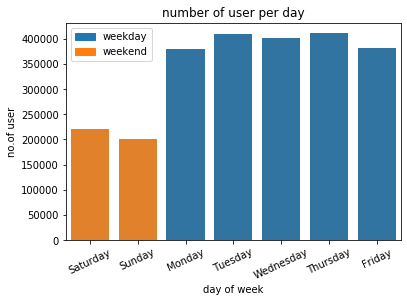

In [7]:
#When are most trips taken in term
weekend_color=sb.color_palette()[1]
weekday_color=sb.color_palette()[0]
color=[weekend_color,weekend_color,weekday_color,weekday_color,
       weekday_color,weekday_color,weekday_color]
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(data=df,x='day_of_week',palette=color,order=order)
plt.xticks(rotation=25)
plt.title('number of user per day')
plt.ylabel('no.of user')
plt.xlabel('day of week')
red_patch = mpatches.Patch(color=weekday_color, label='weekday')
pathch=mpatches.Patch(color=weekend_color,label='weekend')
plt.legend(handles=[red_patch,pathch])
plt.show();

# most of users are customer or subscriber??
 it is clear that most users are subscriber

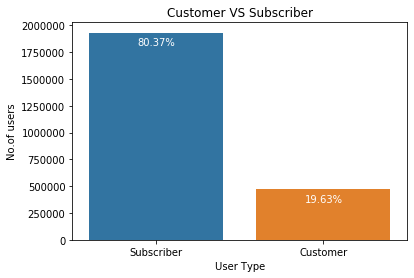

In [8]:
user_count=df['user_type'].value_counts()
total=df.shape[0]
sb.countplot(df.user_type,order=user_count.index)
plt.ylabel('No.of users')
plt.title('Customer VS Subscriber')
plt.xlabel('User Type')
index=0
for i in user_count.keys():
    plt.text(index,user_count[i]-120000,'{:0.2f}%'.format(user_count[i]/total*100),ha='center',color='w')
    index+=1
plt.show();

# Average of Duration of a trip
 the mean duration in minute is 13 minutes with minimum value 1 minutes and maximum value is 1437 minutes(24 hour) ,this doesn't make sense because nobody can ride a bike for whole day ,in my openion the user forget to record the end of his trip,but most of user don't exceed 50 minutes and rare users use it more than an hour

the minimum value of duration : 1.00 minutes
the mean of duration : 13.42 minutes
the maximum value of duration : 1437.17 minutes


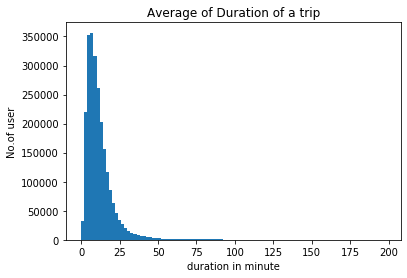

In [9]:
print('the minimum value of duration : {:0.2f}'.format(df.duration_minute.min()),'minutes')
print('the mean of duration : ',end='')
print('{:0.2f}'.format(df.duration_minute.mean()),'minutes')
print('the maximum value of duration : {:0.2f}'.format(df.duration_minute.max()),'minutes')
plt.hist(df.duration_minute,bins=np.arange(0,200,2));
plt.title('Average of Duration of a trip')
plt.xlabel('duration in minute')
plt.ylabel('No.of user')
plt.show();

# the most frequent months bay wheel service is used?
 they use it in december a little bit
 <br>
 the rest of months ,they used it normally

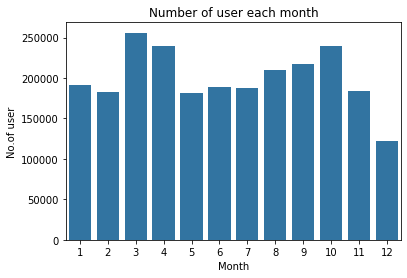

In [10]:
base_color=sb.color_palette()[0]
sb.countplot(df.month,color=base_color) 
plt.title('Number of user each month')
plt.xlabel('Month')
plt.ylabel('No.of user')
plt.show();

# The most frequently hour ford are used 
It rarely used during night espacially after 12PM
<br>
it frequently used from 7AM to 10AM and from 5PM to 8Pm and from 10Am to 5PM it used normally 

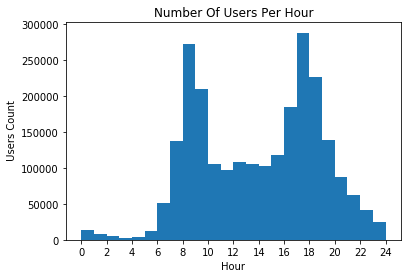

In [11]:
bins=np.arange(25)
ticks=np.arange(0,25,2)
plt.hist(df.hour,bins=bins)
plt.xticks(ticks);
plt.title('Number Of Users Per Hour')
plt.xlabel('Hour')
plt.ylabel(" Users Count")
plt.show();

# which day ford bikes are used frequently
Also ford bike are used a little bit during weekend but user use it for a long period on weekend

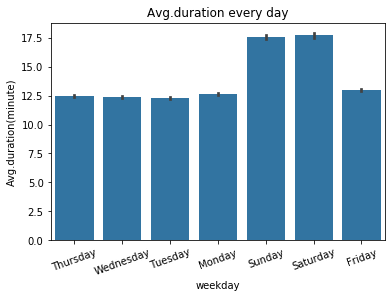

In [12]:
sb.barplot(data=df,x='day_of_week',y='duration_minute',color=base_color)
plt.xticks(rotation=20)
plt.title('Avg.duration every day')
plt.xlabel('weekday')
plt.ylabel('Avg.duration(minute)')
plt.show();

# who used ford bike for along time
it's clear that customer used ford bike longer than subscriber 

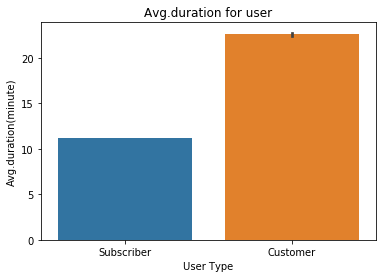

In [13]:
sb.barplot(data=df,x='user_type',y='duration_minute')
plt.title('Avg.duration for user')
plt.xlabel('User Type')
plt.ylabel('Avg.duration(minute)')
plt.show();

# the relation between state of day and duration
also people use bikes frequently during weekdays more than that of weekends ,the mean duration of weekends is bigger than that of weekdays,may because during weekday people seeks to go to their distinations queckly,on the other hand on weekend the have free time so no need to be fast.

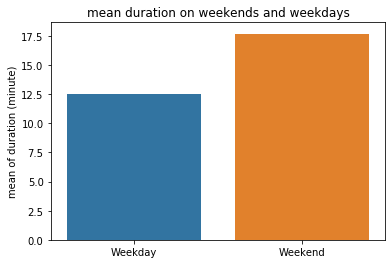

In [14]:
# barplor to get the mean of duration in weekend and weekday
sb.barplot(data=df,x='state_of_day',y='duration_minute',errwidth=0)
plt.title('mean duration on weekends and weekdays')
#empty label 
plt.xlabel('')
plt.ylabel('mean of duration (minute)')
plt.show();

# Customer VS Subscriber in duration time
as most duration time range from zero to 50 minute i make boxplot visualization in this range to see the relation between subscriber and customer and it seems that the customers concour the subscribers in duration minute as minimum and maximum duration for customers is bigger than that of subscriber and first and third quatile too
<br>
the outliers indicate that this is impossible for rider to ride the bike more than hour and sometime it reach 24 hour which is possible ,in my opinion there is problem in software or the user forget to check out and this probably true.

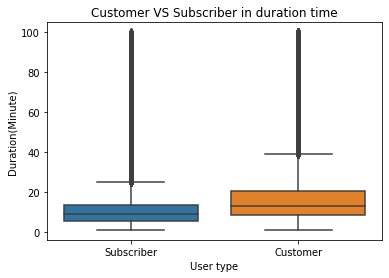

In [15]:
#box plot to data which duration is less than 100 minute
sb.boxplot(data=df[df.duration_minute<100],x='user_type',y='duration_minute')
plt.title('Customer VS Subscriber in duration time')
plt.xlabel('User type')
plt.ylabel('Duration(Minute)')
plt.show();

# the relation between mean of customer and subscriber in weekend and weekday

mean of duration of customer is bigger than that of suscriber 
<br>
the mean of customer at weekend is bigger that of weekday 
<br>
the mean of subscriber is the same during the week if it was at weekend or weekday 

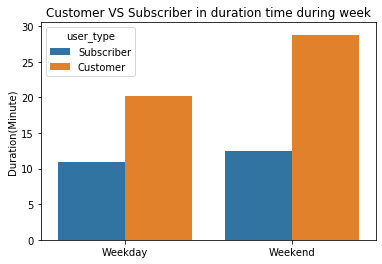

In [16]:
sb.barplot(data=df,x='state_of_day',y='duration_minute',hue='user_type',errwidth=0)
plt.title('Customer VS Subscriber in duration time during week')
plt.xlabel('')
plt.ylabel('Duration(Minute)')
plt.show();